In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm
df=pd.read_csv('Reviews.csv')
df.shape

(568454, 10)

In [5]:
df=df[df['Score'] !=3]

In [6]:
df.shape

(525814, 10)

In [7]:
def partition(x):
    if x<3:
        return 0
    return 1

actualscore=df['Score']
posneg=actualscore.map(partition)
df['Score']=posneg
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
sorted_data=df.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(364173, 10)

In [9]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
final.shape

(364171, 10)

In [10]:
stop = set(stopwords.words('english')) 
sno = nltk.stem.SnowballStemmer('english') 

def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [11]:
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
for i, sent in enumerate(tqdm(final['Text'].values)):
    
    filtered_sentence=[]
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
           
            
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 1: 
                        all_positive_words.append(s) 
                    if(final['Score'].values)[i] == 0:
                        all_negative_words.append(s)
    str1 = b" ".join(filtered_sentence) 
        
    final_string.append(str1)


100%|████████████████████████████████████████████████████████████████████████| 364171/364171 [05:13<00:00, 1160.54it/s]


In [12]:
final['cleaned_text']=final_string

In [13]:
train=final.loc[:,['cleaned_text','Score','Time']]

In [14]:
train['Score'].value_counts()

1    307061
0     57110
Name: Score, dtype: int64

In [15]:
train.head()

,cleaned_text,Score,Time
150523,b'witti littl book make son laugh loud recit c...,1,939340800
150505,b'grew read sendak book watch realli rosi movi...,1,1194739200
150506,b'fun way children learn month year learn poem...,1,1191456000
150507,b'great littl book read nice rhythm well good ...,1,1076025600
150508,b'book poetri month year goe month cute littl ...,1,1018396800


In [16]:
train=train.sort_values('Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [17]:
train=train.loc[:,['cleaned_text','Score']]
train.head()

,cleaned_text,Score
150523,b'witti littl book make son laugh loud recit c...,1
150500,b'rememb see show air televis year ago child s...,1
451855,b'beetlejuic well written movi everyth excel a...,1
374358,b'twist rumplestiskin captur film star michael...,1
451854,b'beetlejuic excel funni movi keaton hilari wa...,1


In [18]:
train=train.iloc[0:1000,:]
train.shape


(1000, 2)

In [19]:
count_vect = CountVectorizer() 
final_counts = count_vect.fit_transform(train['cleaned_text'].values)
vectors=final_counts.toarray()
X=pd.DataFrame.from_records(vectors)
y=train['Score']




The optimal number of neighbors is 7.


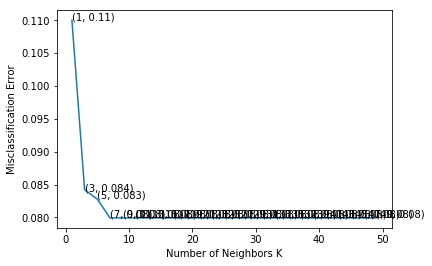

the misclassification error for each k value is :  [0.11  0.084 0.083 0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08
 0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08
 0.08 ]


In [20]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [21]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 7 is 93.000000%


In [22]:
#tf-idf
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(train['cleaned_text'].values)


In [23]:
tf_vectors=final_tf_idf.toarray()




The optimal number of neighbors is 9.


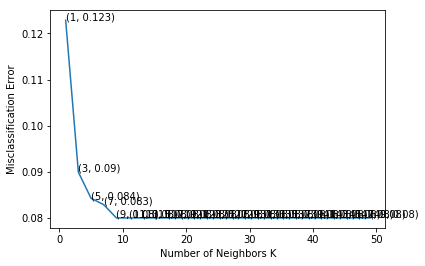

the misclassification error for each k value is :  [0.123 0.09  0.084 0.083 0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08
 0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08
 0.08 ]


In [24]:
X=pd.DataFrame.from_records(tf_vectors)
y=train['Score']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))


In [25]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 9 is 93.000000%


In [32]:
#avg w2v
i=0
list_of_sent=[]
for sent in train['cleaned_text'].values:
    list_of_sent.append(sent.split())

train['cleaned_text']=train['cleaned_text'].str.decode("utf-8")
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)


    



In [37]:
w2v_words = list(w2v_model.wv.vocab)
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
        sent_vectors.append(sent_vec)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1430.84it/s]


In [38]:
print(sent_vectors[0])

[ 0.24618676  0.06300149  0.11730444 -0.05695385 -0.21481967  0.03945934
 -0.24870801  0.59491309 -0.23162774 -0.56894208 -0.19095118 -0.44557939
 -0.29850895 -0.19535926  0.07486828  0.02499762 -0.06641244  0.19446246
  0.10922412  0.06221421  0.0146843   0.0361621  -0.16332963 -0.20174495
  0.20259093  0.20490584 -0.51094336 -0.26109883  0.38035045  0.1402396
  0.39756419 -0.14031032  0.28651713  0.06886852  0.17754699  0.06548138
 -0.52155263 -0.32727364  0.39779907  0.04956562  0.13071129  0.00971577
 -0.01631813 -0.00917917  0.42825211 -0.07884043 -0.19147524 -0.23560839
  0.25805083 -0.4086565 ]


In [41]:
sent_vectors=np.array(sent_vectors)

In [42]:
sent_vectors.ndim


2

In [43]:
type(sent_vectors)

numpy.ndarray

In [44]:
X=pd.DataFrame.from_records(sent_vectors)
y=train['Score']


The optimal number of neighbors is 11.


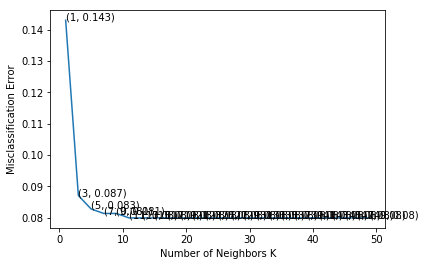

the misclassification error for each k value is :  [0.143 0.087 0.083 0.081 0.081 0.08  0.08  0.08  0.08  0.08  0.08  0.08
 0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08
 0.08 ]


In [45]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [46]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 11 is 93.000000%


In [47]:
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(final['cleaned_text'].values)
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [48]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1077.04it/s]


In [49]:
tfidf_sent_vectors=np.array(tfidf_sent_vectors)
X=pd.DataFrame.from_records(tfidf_sent_vectors)
y=train['Score']


The optimal number of neighbors is 11.


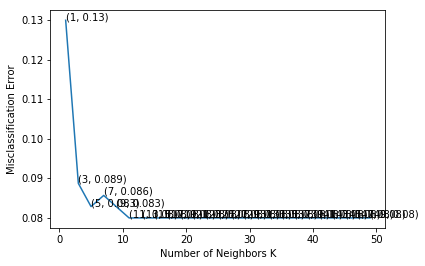

the misclassification error for each k value is :  [0.13  0.089 0.083 0.086 0.083 0.08  0.08  0.08  0.08  0.08  0.08  0.08
 0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.08
 0.08 ]


In [50]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))


cv_scores = []


for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


MSE = [1 - x for x in cv_scores]


optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))


In [51]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
pred = knn_optimal.predict(X_test)
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 11 is 93.000000%
